# Drzewa decyzyjne

Podobnie jak w przypadku maszyny wektorów nosnych (SVC), drzewa decyzyjne sa wszechstronnym algorytmem uczenia maszynowego. Mogą słuzyc do rozwiazywania problemów zarówno klasyfikacji, jak i regresji. W przeciwieństwie do modelu SVC drzewa decyzyjne nie wymagają restrykcyjnego przygotowania danych (np. skalowania cech). Drzewa decyzyjne składaja sie z korzenia oraz gałezi prowadzacych do kolejnych wierzchołków. W wezłach - wierzchołkach z których wychodzi co najmniej jedna krawedź, sprawdzany jest pewien warunek. Na jego podstawie, wybierana jest gałaz prowadząca do kolejnego wierzchołka. Dana obserwacja zostaje zaklasyfikowana do konkretnej klasy po przejściu od korzenia do liscia i przypisaniu do tej obserwacji klasy, z danego liscia (nie wychodza z niego wezły potomne).

Za pomocą drzew decyzyjnych otrzymać możemy potężne modele zdolne do nauki złożonych zbiorów danych.

###  Las losowy

Klasyfikator lasu losowego jest klasyfikatorem zespołowym złozonym z drzew decyzyjnych. Klasyfikator ten wprowadza dodatkową losowość do wzrostu drzew. Nie wyszukuje on najlepszej cechy podczas podziału na wezły, ale szuka najlepszej cechy wsród losowego podziału cech. Powoduje to wieksze zróznicowanie powstałych w klasyfikatorze drzew. Losowe lasy są bardziej odporne na nadmierne dopasowanie się do zbioru treningowego, jakie spotykane jest podczas użycia drzew decyzyjnych.

In [15]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 50, 1: 50, 2: 50}

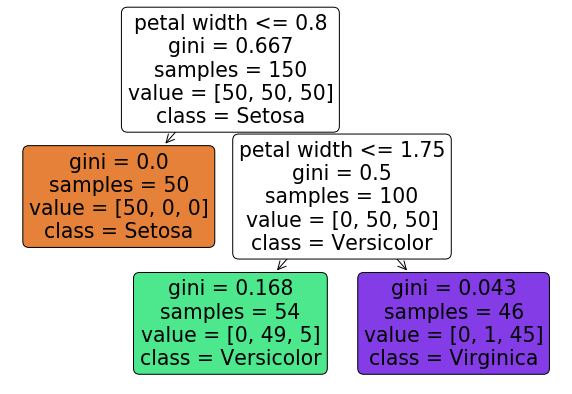

In [7]:
import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
tree.fit(X, y)

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length', 
                         'petal width']) 

plt.show()

### Jak podejmowane są decyzje w drzewie?

Klasyfikacja próbki zaczyna się zawsze od korzenia (węzeł na samej górze grafu). W węźle zadawane jest pytanie (w przykładnie powyżej czy długość płatka jest mniejsza od 0.8). Jeśli prawda przechodzimy do węzła potomnego lewego, w przeciwnym razie do prawego. Przechodząc do węzła lewego dochodzimy do **liścia** (leaf node, nie posiada węzłów potomnych) - w taki wypadku żadne pytanie nie jest zadawane, przydzielana jest już tylko klasa do danej obserwacji. 

W przypadku, gdy skierujemy się ku węzłowi prawemu (nie jest już liściem) zadajemy kolejne pytanie, aż dojdziemy do liścia.

Znaczenie atrybutów:

- *samples* - oznacza ilość wyznaczonych próbek dla danego węzła (zgadza się to w przedstawionym przypadku z ilością próbek dla danych klas)
- *value* - określa ilość przykładów uczących z każdej klasy jakie przynależą do danego węzła.
- *gini* - miara zanieczyszczenia węzła (0 oznacza, że wszystkie próbki w węźle należą do jednej klasy - idealna klasyfikacja)

Wskaźnik Gingiego:
    \begin{equation*}
 G_{i} = 1 - \sum_{k=1}^{n} p_{i, k}^{2}
\end{equation*}
gdzie $p_{i,k}$ oznacza współczynie występowania klas k, wśród próbek uczących w węźle i.

Jako wskaźnik zanieczyszczenia (parametr *entropy*), użyta może zostać również miara entropii. Wynosi ona 0, w przypadku, gdy wszystkie informacje są takie same - wszystkie próbiki w węźle należą do jednej klasy.

Entropia:
    
\begin{equation*}
    H_{i} = - \sum_{k=1\\ p_{i,k} \neq 0}^{n} p_{i, k} log(p_{i,k})
\end{equation*}


Różnice pomędzy tymi dwoma miarami są zazwyczaj bardzo znikome i nie wypływają znacząco na skuteczność działania klasyfikatora. Dla zainteresowanych szczegółami zapraszam do lektury: https://sebastianraschka.com/faq/docs/decision-tree-binary.html, https://towardsdatascience.com/the-simple-math-behind-3-decision-tree-splitting-criterions-85d4de2a75fe

W jakim momencie przestać budować drzewo decyzyje?

Problemy rozważane w uczeniu maszynowym mają zazwyczaj sporą liczbę cech, która może powodować wysoko rosnące skomplikowanie drzewa (jego wielkość, sporą ilość węzłów oraz podziałów w węzłach). Tak utworzone drzewa mogą powodować nadmierne dopasowanie do danych treningowych.

Algorytm drzewa decyzyjnego posiada parametry, które ustalane są podczas uczenia. Jak wspomniano, może powodować to przetrenowanie klasyfikatora (nadmierne dopasowanie do danych uczących). Aby tego uniknąć, dobrym rozwiązaniem okazuje się ograniczenie swobody działania klasyfikatora. Podobnie jak w przypadku klasyfikatora SVC, również dla drzewa decyzyjnego zdefinowane zostały parametry regularyzacyjne:

- *max_depth* - maksymalna wysokość drzewa
- *min_samples_split* - minimalna liczba próbek, jakie będą w węźle (przed podziałem)
- *min_samples_leaf* - minimalna liczba próbek, jakie będą w liściu
- *max_leaf_nodes* - maksymalna ilość liści
- *max_features* - maksymalna liczba cech używana do dzielenia węzła.

Modyfikacja tych parametrów powoduje regularyzację drzewa i zmniejsza ryzyko przetrenowania.

## Zadania

### Zadanie 1

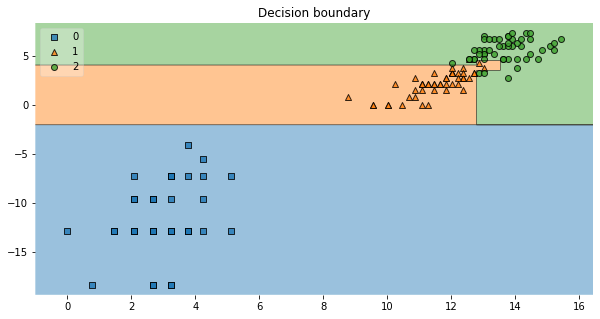

In [19]:
from mlxtend.plotting import plot_decision_regions


tree = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)
tree.fit(np.log(X ** 8), y)
fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree']
fig = plot_decision_regions(X=np.log(X ** 8), y=y, clf=tree, legend=2)
plt.title("Decision boundary")
plt.show()

Jakie wnioski możne sformuować na bazie granic decyzyjnych przedstawionych powyżej? W momencie pojawianie się dodatkowej próbki klasy *zielonej* (2), zostanie ona dobrze sklasyfikowana? Czy klasyfikator posiada dobre właściwości generalizujące?

### Zadanie 2

Proszę wytrenować zbiór z użyciem algorytmu drzewa decyzyjnego. Proszę pamiętać o odpowienim podziale na zbiór uczący i treningowy. Klasyfikator powinien być trenowany na zbiorze treningowym, a wynik jego skuteczności po trenowaniu obliczany w oparciu o zbiór testowy.

Proszę przygotować wyniki, trenując algorytm z użyciem różnych parametrów - należy przygotować wykresy (oś pionowa określa skuteczność, pozioma wartość parametru) pokazujące jak zmienia się skuteczność działania w zależności od zastosowanych wartości parametrów. Proszę o przygotowanie odpowiedniego porównania (tabela), co można zaobserwować?

In [24]:
class DecisionTreeClassifierData:
    def __init__(self,max_depth,criterion,random_state,accuracy_score):
        self.max_depth = max_depth
        self.criterion = criterion
        self.random_state = random_state
        self.accuracy_score = accuracy_score

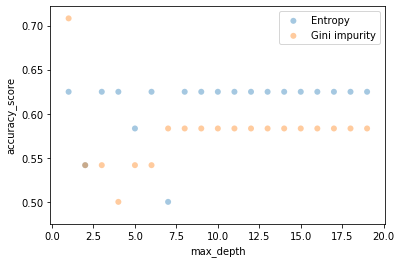

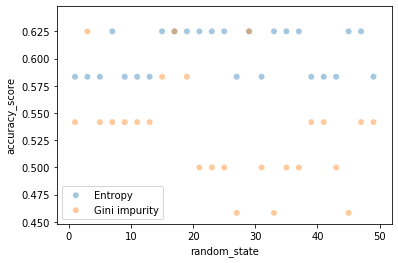

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

cancer_df = pd.read_csv('datasets/Breast.csv')
cancer_df.head()
features = list(cancer_df.columns[0:9])
cancer_df['Classification'] = cancer_df['Classification'].map(lambda x: 1 if x == 1 else 0)


X_train, X_test, y_train, y_test = train_test_split(cancer_df[features],cancer_df['Classification'],test_size=0.2, train_size=0.8)

entropy_max_depth_list = []
gini_max_depth_list = []
entropy_random_state_list = []
gini_random_state_list = []

for max_depth in range(1,20): 
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=1)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    entropy_max_depth_list.append(DecisionTreeClassifierData(max_depth,'entropy',1,accuracy_score))
    
for max_depth in range(1,20): 
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='gini', random_state=1)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    gini_max_depth_list.append(DecisionTreeClassifierData(max_depth,'gini',1,accuracy_score)) 
    
for random_state in range(1,50,2): 
    clf = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=random_state)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    gini_random_state_list.append(DecisionTreeClassifierData(5,'gini',random_state,accuracy_score))
    
for random_state in range(1,50,2): 
    clf = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=random_state)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    entropy_random_state_list.append(DecisionTreeClassifierData(5,'entropy',random_state,accuracy_score))
    
fig, ax = plt.subplots()
    
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')

ax.scatter([e.max_depth for e in entropy_max_depth_list], [e.accuracy_score for e in entropy_max_depth_list], label='Entropy', alpha = 0.4, edgecolors='none')
ax.scatter([e.max_depth for e in gini_max_depth_list], [e.accuracy_score for e in gini_max_depth_list], label='Gini impurity', alpha = 0.4, edgecolors='none')

ax.legend()
plt.show()

figu, bx = plt.subplots()
    
plt.xlabel('random_state')
plt.ylabel('accuracy_score')

bx.scatter([e.random_state for e in entropy_random_state_list], [e.accuracy_score for e in entropy_random_state_list], label='Entropy', alpha = 0.4, edgecolors='none')
bx.scatter([e.random_state for e in gini_random_state_list], [e.accuracy_score for e in gini_random_state_list], label='Gini impurity', alpha = 0.4, edgecolors='none')

bx.legend()
plt.show()

### Zadanie 3

Drzewa decyzyjne mogą również szacować przewdopodobieństwo przynależności danej próbki do określonej klasy. Proszę przeprowadzić odpowiednie trenowanie klasyfikatora i określić jak zmienia się prawdopodobieństwo przynależności różnych próbek. Wystarczy odnaleźć odpowienią właściwość klasyfikatora i pokazać jakie jest zwracane prawdopodobieństwo dla kilku przykładów.

In [101]:
clf = DecisionTreeClassifier(max_depth=7, criterion='entropy', random_state=15)
clf = clf.fit(X_train,y_train)

proba = clf.predict_proba(X_train)

print(proba[21:30])

[[1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.25 0.75]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]]


### Zadanie 4

Proszę wyrysować granice decyzyjne dla klasyfikatora drzewa decyzyjnego utworzonego we wcześniejszym zadaniu. Jakie można sformuować wnioski?

     Age        BMI  Glucose  Insulin       HOMA   Leptin  Adiponectin  \
102   65  30.915577       97   10.491   2.510147  44.0217     3.710090   
33    43  34.422174       89   23.194   5.091856  31.2128     8.300955   
76    55  31.975015       92   16.635   3.775036  37.2234    11.018455   
71    44  24.740000      106   58.460  15.285341  18.1600    16.100000   
59    62  22.656250       92    3.482   0.790182   9.8648    11.236235   
..   ...        ...      ...      ...        ...      ...          ...   
94    60  31.231410      131   30.130   9.736007  37.8430     8.404430   
89    58  29.154519      139   16.582   5.685415  22.8884    10.262660   
35    67  29.606767       79    5.819   1.133929  21.9033     2.194280   
107   46  33.180000       92    5.750   1.304867  18.6900     9.160000   
90    40  30.836531      128   41.894  13.227332  31.0385     6.160995   

     Resistin    MCP.1  
102  20.46850  396.648  
33    6.71026  960.246  
76    7.16514  483.377  
71    5.310

ValueError: Filler values must be provided when X has more than 2 training features.

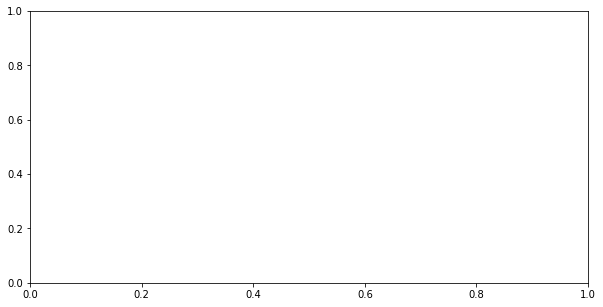

In [120]:
fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree']
print(X_train)
fig = plot_decision_regions(X=X_train.to_numpy(), y=y_train.to_numpy(), clf=clf)
plt.title("Decision boundary")
plt.show()

In [ ]:
Za pomocą funkcji plot_decision_regions() nie da się wyrysować granicy decyzyjnej dla modelu z dziewięcioma cechami. 